<a href="https://colab.research.google.com/github/ElaStain/InteligenciaArticial_lcdn4toSem/blob/main/redesNeuronalesMulticapa/empleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Generar dataset sintético con diferentes rangos por habilidad
n_muestras = 5000
# Habilidades técnicas: 70-100
tec = np.random.randint(70, 101, (n_muestras, 6))
# Habilidades matemáticas: 60-90
mat = np.random.randint(60, 91, (n_muestras, 6))
# Habilidades psicológicas: 50-85
psi = np.random.randint(50, 86, (n_muestras, 6))
# Nombres de columnas
columnas = [
    'python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube',
    'estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado',
    'trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas'
]
# Crear DataFrame
df = pd.DataFrame(np.concatenate([tec, mat, psi], axis=1), columns=columnas)

In [ ]:
# Calcular promedio por grupo y promedio total
prom_tecnologicas = df[['python', 'sql', 'visualizacion_datos', 'excel', 'manejo_apis', 'nube']].mean(axis=1)
prom_matematicas  = df[['estadistica', 'probabilidad', 'algebra_lineal', 'calculo', 'optimizacion', 'modelado']].mean(axis=1)
prom_psicologicas = df[['trabajo_equipo', 'comunicacion', 'creatividad', 'adaptabilidad', 'liderazgo', 'resolucion_problemas']].mean(axis=1)
# Promedio total = promedio de los 3 promedios
prom_total = (prom_tecnologicas + prom_matematicas + prom_psicologicas) / 3
# Etiqueta: 1 = apto si promedio total > 80
y = (prom_total > 75).astype(int)
# one-hot encoding
y = pd.get_dummies(y).values

#axis, eje 1 hor. 0 vertical

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.2, random_state=42
)

# Escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# escalamiento desv. est. de 1, todo intervalo se puede llevar a 0,1.

In [ ]:
# semillas cripto

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])

adam = Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = modelo.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7887 - loss: 0.4015 - val_accuracy: 0.9660 - val_loss: 0.0858
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9707 - loss: 0.0693 - val_accuracy: 0.9740 - val_loss: 0.0646
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9799 - loss: 0.0488 - val_accuracy: 0.9720 - val_loss: 0.0637
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9860 - loss: 0.0358 - val_accuracy: 0.9740 - val_loss: 0.0641
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9917 - loss: 0.0230 - val_accuracy: 0.9730 - val_loss: 0.0691
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9931 - loss: 0.0213 - val_accuracy: 0.9790 - val_loss: 0.0584
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9945 - loss: 0.0199 - val_accuracy: 0.9680 - val_loss: 0.0876
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0127 - val_accuracy: 0.

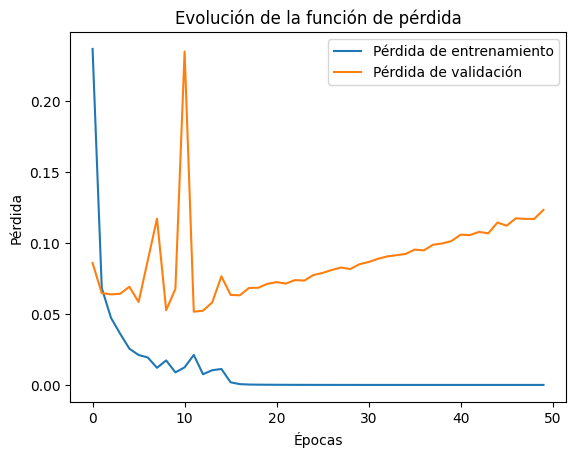

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9809 - loss: 0.1356

🔹 Loss: 0.1232  |  Accuracy: 0.9810


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolución de la función de pérdida')
plt.show()

loss, acc = modelo.evaluate(X_test, y_test)
print(f"\n🔹 Loss: {loss:.4f}  |  Accuracy: {acc:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


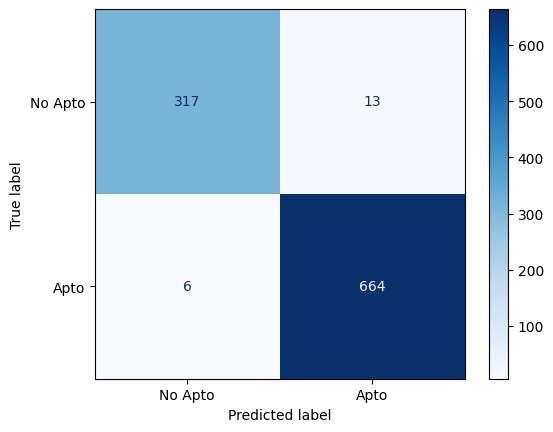


Sensitivity (Recall) por clase:
No Apto: 0.96
Apto: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


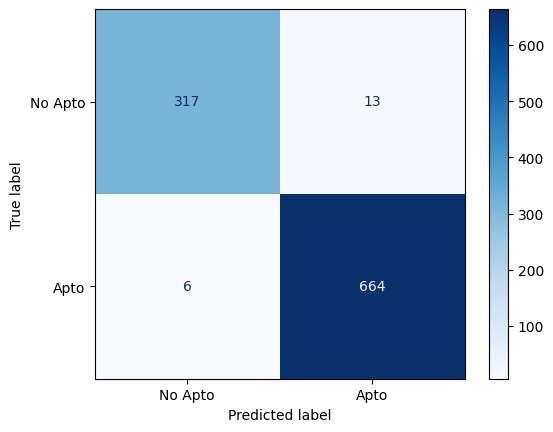


Sensitivity (Recall) por clase:
No Apto: 0.96
Apto: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred = modelo.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Apto', 'Apto'])
disp.plot(cmap='Blues')
plt.show()

sensitivity = recall_score(y_true, y_pred, average=None)
print("\nSensitivity (Recall) por clase:")
print(f"No Apto: {sensitivity[0]:.2f}")
print(f"Apto: {sensitivity[1]:.2f}")

In [ ]:
nuevo_candidato = np.array([[90, 88, 85, 87, 84, 89,   # técnicas
                             82, 86, 85, 83, 87, 80,   # matemáticas
                             70, 75, 80, 72, 78, 74]]) # psicológicas

nuevo_candidato_scaled = scaler.transform(nuevo_candidato)
pred_nuevo = modelo.predict(nuevo_candidato_scaled)
clase_predicha = np.argmax(pred_nuevo)

print("Evaluación de nuevo candidato:")
print(f"Resultado: {'Apto' if clase_predicha == 1 else 'No Apto'}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
Evaluación de nuevo candidato:
Resultado: Apto
